In [1]:
#import sys 
#sys.path.append('d:/anaconda/lib/site-packages')
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
#open the JSON file that I downloaded earlier and convert it to dataframe
data_list2019 = json.loads(open('fringe_2019.json').read())
fringe_2019 = pd.DataFrame(data_list2019)
data_list2018 = json.loads(open('fringe_2018.json').read())
fringe_2018 = pd.DataFrame(data_list2018)
data_list2017 = json.loads(open('fringe_2017.json').read())
fringe_2017 = pd.DataFrame(data_list2017)

# 1. What kinds of company do the artists who perform many times come from

The relationship between the number of performance times and their artist types.

#### First, find out artists who performed more than once, their artist types, and the number of their performances.

In [4]:
#Write a method to deal with annual data: include artist, artist type, number of occurrences, etc
def several_artist_type(df,year):
    data=df['artist']
    frame=pd.DataFrame(data=df,columns=['artist','artist_type'])  

    a = frame.drop_duplicates(subset=['artist'],keep='first')
    b = frame.drop_duplicates(subset=['artist'],keep=False)
    c = a.append(b).drop_duplicates(subset=['artist'],keep=False) 
    several = frame.loc[frame['artist'].isin(c['artist'])]

    several_count=several['artist'].value_counts().rename_axis('artist').reset_index(name='counts')
    artist_type=pd.DataFrame(frame['artist_type'])

    df_several=pd.merge(left=several_count,right=frame,on='artist')
    df_several['year'] = year
    df_several = df_several.drop_duplicates(subset=['artist'],keep='first')
    df_several.to_csv('1at_'+year+'.csv')
    print('\nNumber of performances and artist types for those who performed more than once in'+ year)
    print(df_several)
several_artist_type(fringe_2019,'2019')
several_artist_type(fringe_2018,'2018')
several_artist_type(fringe_2017,'2017')




Number of performances and artist types for those who performed more than once in2019
                                     artist  counts  \
0         Fair Pley / The Stand Comedy Club      45   
45    American High School Theatre Festival      32   
77                        Avalon Promotions      23   
100       Edinburgh Festival Fringe Society      22   
122                Off The Kerb Productions      18   
...                                     ...     ...   
1330                  Guru Dudu Productions       2   
1332                                Dogfish       2   
1334                    Karen Gemma Brewer        2   
1336    The Pushkinettes with Heroes / PWYW       2   
1338          Viva Arts and Community Group       2   

                    artist_type  year  
0          Professional company  2019  
45        Student/Youth company  2019  
77         Professional company  2019  
100        Professional company  2019  
122        Professional company  2019  
...         

#### Second, scatterplot to see the relationship between the number of performances and artist types.

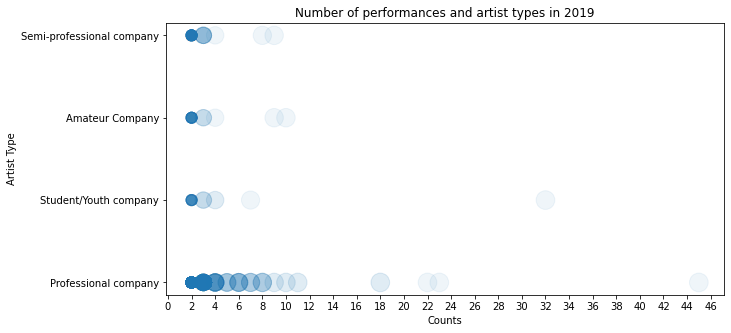

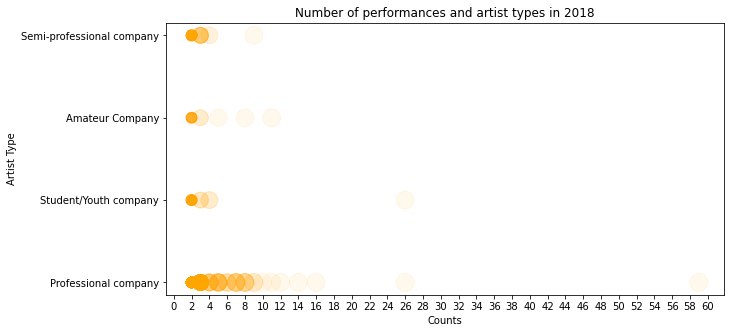

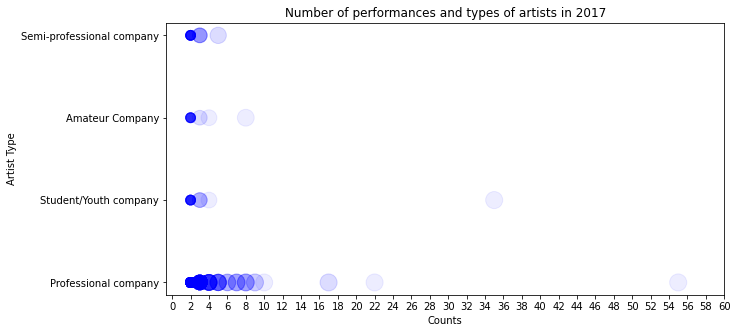

In [13]:
# The distribution of clusters in 2019

# Each dot represents an artist.
# The x-axis represents the number of performances and the y-axis represents the artist type.
# The darker the dot, the more dots overlap at this point.

plt.figure(figsize=(10,5))

size=df_several_2019["counts"].rank()
n=0.8

Scatterplot2019=plt.scatter(df_several_2019["counts"],df_several_2019["artist_type"],s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,47,2)
plt.xticks(x)
plt.title('Number of performances and artist types in 2019')
plt.show()


# The distribution of clusters in 2018
plt.figure(figsize=(10,5))

size=df_several_2018["counts"].rank()
n=0.8

Scatterplot2018=plt.scatter(df_several_2018["counts"],df_several_2018["artist_type"],color='orange',s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,61,2)
plt.xticks(x)
plt.title('Number of performances and artist types in 2018')
plt.show()

# The distribution of clusters in 2017
plt.figure(figsize=(10,5))

size=df_several_2017["counts"].rank()
n=0.8

Scatterplot2017=plt.scatter(df_several_2017["counts"],df_several_2017["artist_type"],color='blue',s=size*n,alpha=0.07)
plt.xlabel('Counts')   
plt.ylabel('Artist Type') 
x = range(0,61,2)
plt.xticks(x)
plt.title('Number of performances and types of artists in 2017')
plt.show()

## Explanation

#### The color of dots
* The darker the dots, the more often artists from the same type of company perform.
* When the number of performances is 2, there is little difference in the number of artists of the four types of companies. (Actually large, just according to the overlap point color, the naked eye can not see)
* When the number of performances is 3, the network color of the professional company is darker than that of the other three companies. It is also like a dark color when the number of performances is 2.
* This indicates that professional companies have more opportunities to train artists who perform more than twice, thus improving their achievements.